<a href="https://colab.research.google.com/github/DhrutiDhruti/Network-Congestion-Prediction-using-ML/blob/main/Congestion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Conv1D, Flatten, Embedding, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load and preprocess the data
data = pd.read_csv("/content/real_time_network_congestion_data.csv")  # Ensure correct file path
X = data.drop("Congestion_Status", axis=1).values
y = data["Congestion_Status"].values

In [ ]:
# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)



In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape data for RNN models
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# 1. Define RNN model
def build_rnn():
    model = Sequential([
        SimpleRNN(32, activation='gelu', input_shape=(X_train_rnn.shape[1], 1)),
        Dense(16, activation='gelu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 2. Define RNN+LSTM model
def build_rnn_lstm():
    model = Sequential([
        SimpleRNN(32, activation='relu', input_shape=(X_train_rnn.shape[1], 1), return_sequences=True),
        LSTM(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 3. Define LSTM model
def build_lstm():
    model = Sequential([
        LSTM(32, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# 4. Define CNN-Transformer model
def build_cnn_transformer():
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        BatchNormalization(),
        LSTM(32, activation='relu', return_sequences=True),
        Dense(16, activation='relu'),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
def build_cnn_bilstm():
    model = Sequential([
        # CNN Layer for feature extraction
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        BatchNormalization(),
        Dropout(0.2),

        # BiLSTM Layer for capturing temporal dependencies
        tf.keras.layers.Bidirectional(LSTM(32, return_sequences=False, activation='relu')),
        Dropout(0.2),

        # Fully connected layers
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Train and evaluate models
def train_and_evaluate(model_fn, model_name):
    model = model_fn()
    history = model.fit(X_train_rnn, y_train, validation_data=(X_test_rnn, y_test), epochs=30, batch_size=32, verbose=0)
    y_pred = (model.predict(X_test_rnn) > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {acc * 100:.2f}%")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Congested', 'Congested'],
                yticklabels=['Non-Congested', 'Congested'])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return history, acc

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

RNN Accuracy: 99.75%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       815

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



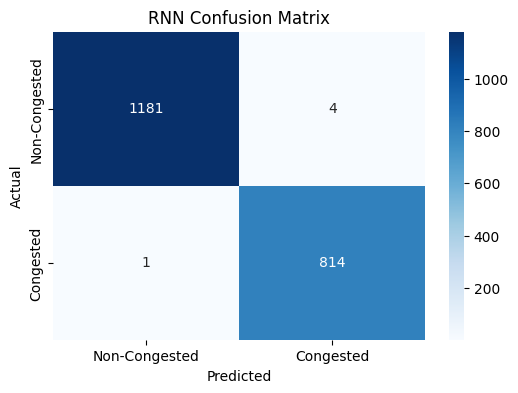

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

RNN+LSTM Accuracy: 99.75%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       815

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



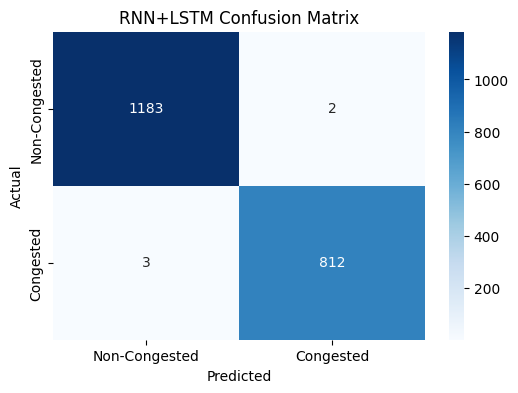

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

LSTM Accuracy: 99.75%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       815

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



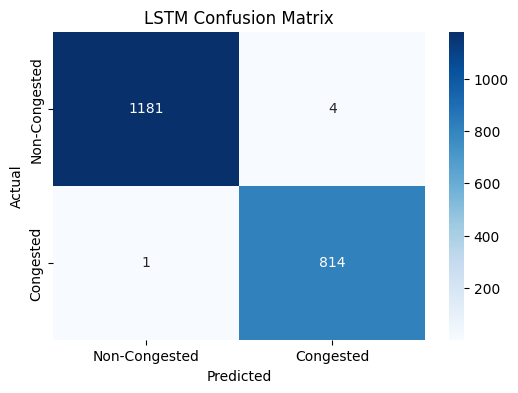

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

CNN+Transformer Accuracy: 99.85%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       815

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



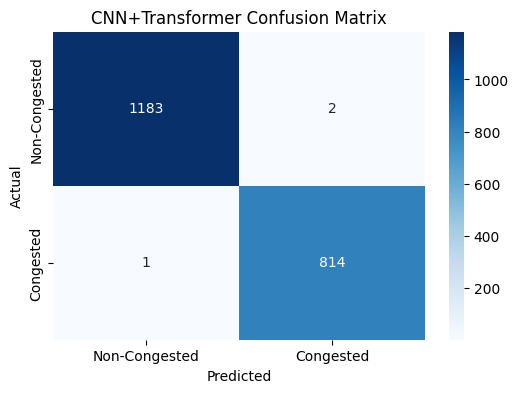

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

CNN+BiLSTM Accuracy: 99.80%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       815

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



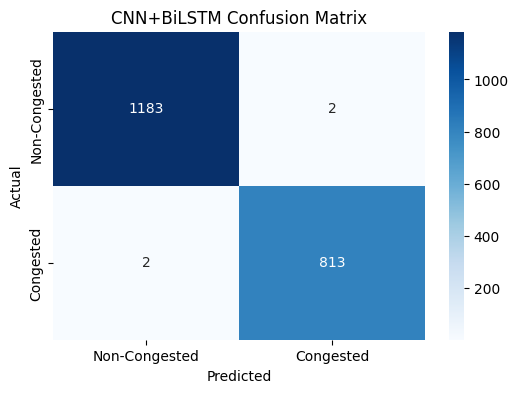

In [ ]:
# Train all models
histories = {}
accuracies = {}
for model_fn, model_name in zip([build_rnn, build_rnn_lstm, build_lstm, build_cnn_transformer, build_cnn_bilstm],
                                ["RNN", "RNN+LSTM", "LSTM", "CNN+Transformer","CNN+BiLSTM"]):
    history, acc = train_and_evaluate(model_fn, model_name)
    histories[model_name] = history
    accuracies[model_name] = acc

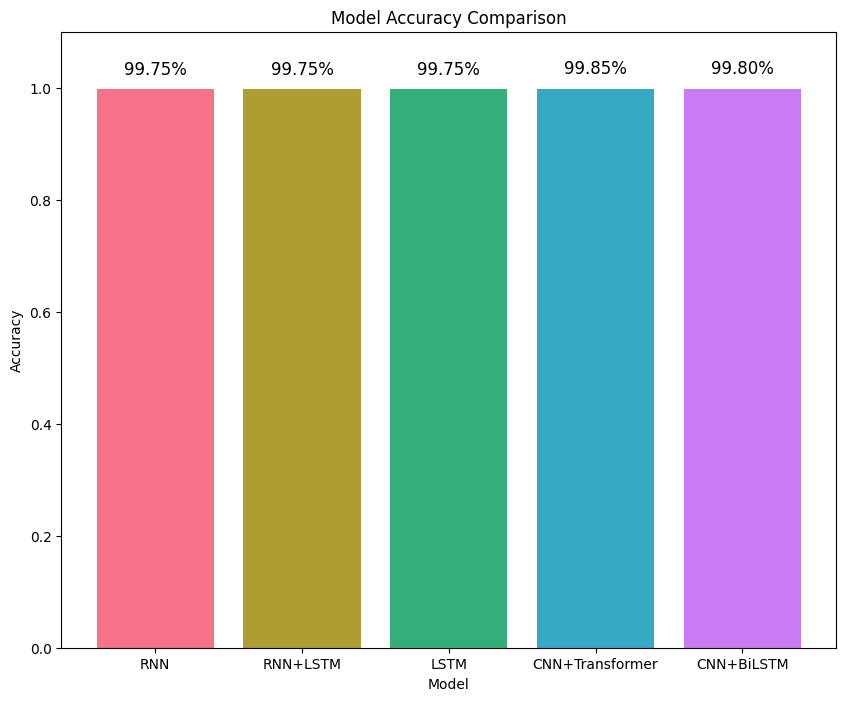

In [ ]:
# Plot comparison of model accuracies
plt.figure(figsize=(10, 8))
palette = sns.color_palette("husl", 5)
bars = plt.bar(accuracies.keys(), accuracies.values(), color=palette)

# Add percentages above each bar with adjusted spacing
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        height + 0.02,  # Slightly above the bar's height for spacing
        f"{height * 100:.2f}%",  # Text (convert to percentage)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=12,  # Font size
        color='black'  # Text color
    )

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1.1)  # Ensure y-axis scale allows room for text above bars
plt.show()


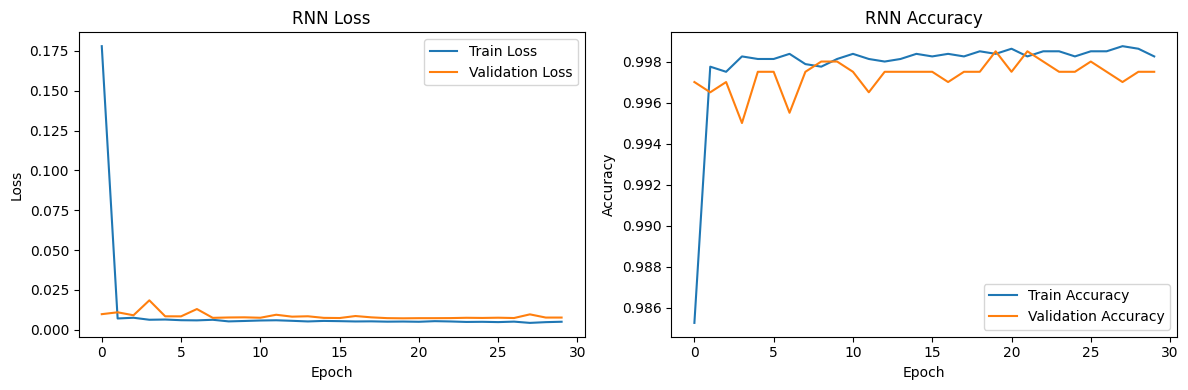

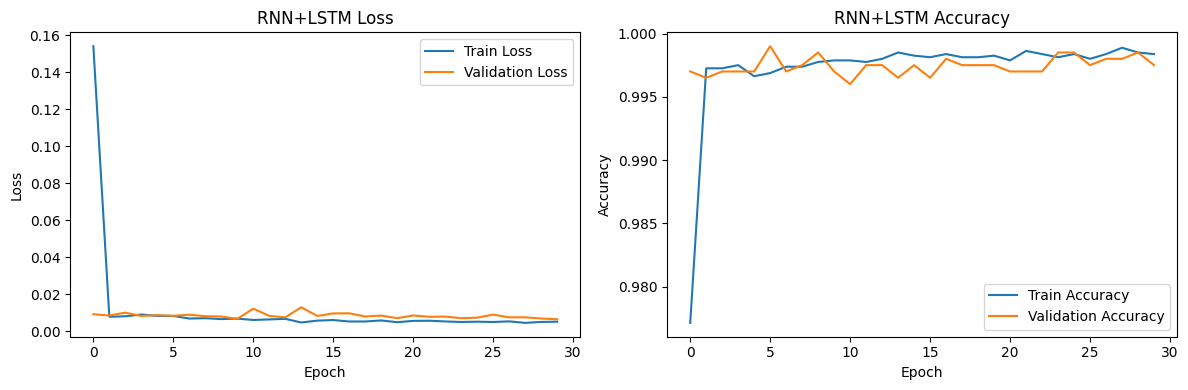

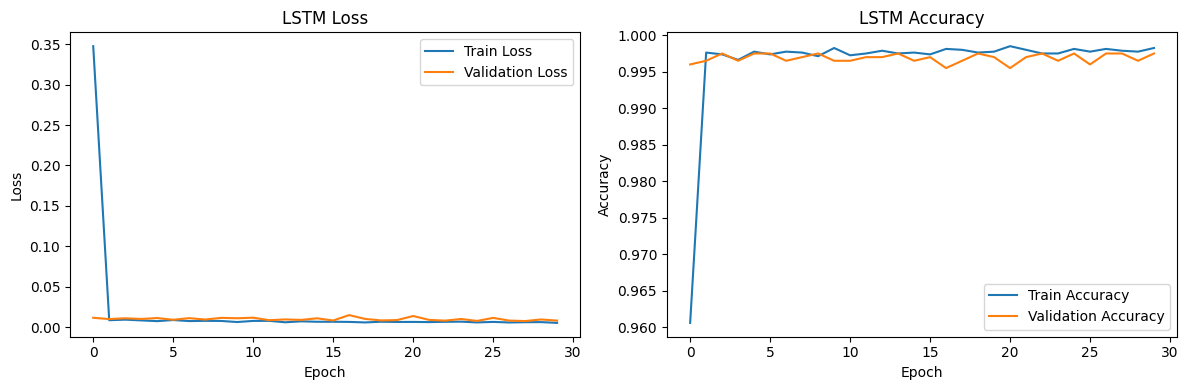

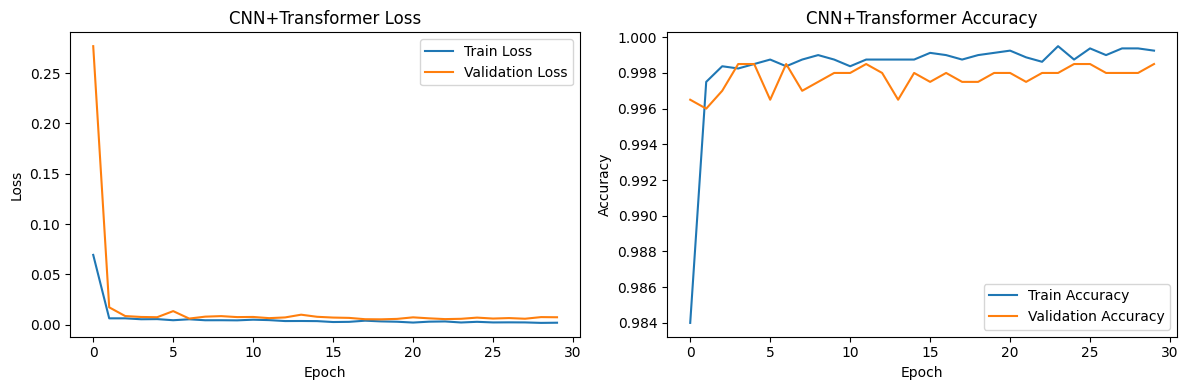

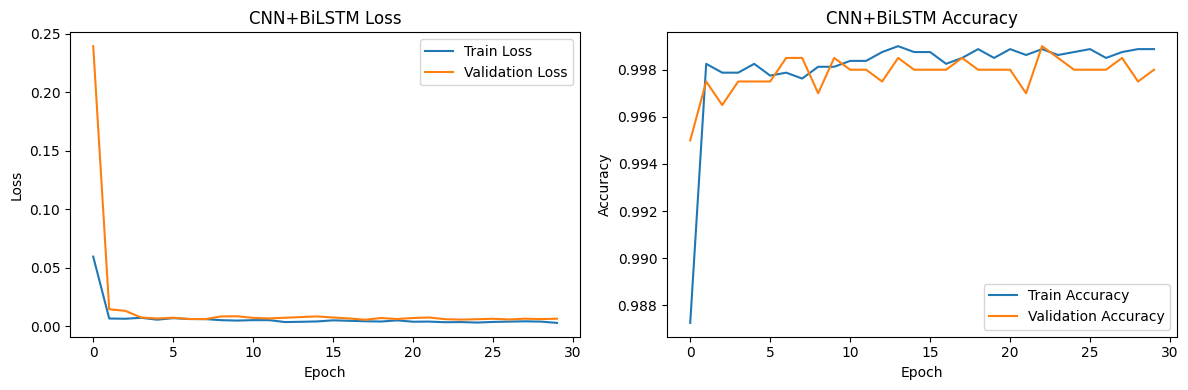

In [ ]:
# Plot loss and accuracy for all models
for model_name, history in histories.items():
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf

anomalous_data = pd.read_csv("/content/anomalous_network_congestion_data.csv")
# Preprocess data: split into features and labels
X = anomalous_data.drop(columns=["Congestion_Status"]).values
y = anomalous_data["Congestion_Status"].values


X = pd.DataFrame(X).fillna(pd.DataFrame(X).mean(axis=0)).values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Reshape for deep learning models requiring 3D input (e.g., RNN, LSTM, CNN)
X_train_rnn = X_train_smote.reshape(X_train_smote.shape[0], X_train_smote.shape[1], 1)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def train_and_evaluate(model_fn, model_name):
    print(f"Training {model_name}...")

    # Build model
    model = model_fn()

    # Train the model
    history = model.fit(X_train_rnn, y_train_smote, validation_split=0.2, epochs=50, batch_size=20, verbose=0)

    # Evaluate on test data
    y_pred = (model.predict(X_test_rnn) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)

    print(f"{model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    return history, acc


In [ ]:
# 1. RNN
def build_rnn():
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 2. RNN+LSTM
def build_rnn_lstm():
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)),
        tf.keras.layers.LSTM(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 3. LSTM
def build_lstm():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(64, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 4. CNN+Transformer
def build_cnn_transformer():
    input_layer = tf.keras.layers.Input(shape=(X_train_rnn.shape[1], 1))
    x = tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    # Transformer block
    # Reshape the output of GlobalAveragePooling1D to be compatible with MultiHeadAttention
    x = tf.keras.layers.Reshape((-1, 64))(x)  # Reshape to (batch_size, 1, 64)
    transformer_block = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=64)(x, x)
    x = tf.keras.layers.Add()([x, transformer_block])
    x = tf.keras.layers.Flatten()(x)  # Flatten the output before the Dense layers
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 5. CNN+BiLSTM
def build_cnn_bilstm():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=False, activation='relu')),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

def train_and_evaluate(model_fn, model_name):
    print(f"Training {model_name}...")

    # Build model
    model = model_fn()

    # Train the model
    history = model.fit(X_train_rnn, y_train_smote, validation_split=0.2, epochs=50, batch_size=20, verbose=0)

    # Evaluate on test data
    y_pred = (model.predict(X_test_rnn) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)

    print(f"{model_name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Return history, accuracy, and the model # This line is added to return the model object
    return history, acc, model

In [ ]:
# Initialize dictionaries to store results
histories = {}
accuracies = {}

# List of model functions and corresponding names
model_functions = [build_rnn, build_rnn_lstm, build_lstm, build_cnn_transformer, build_cnn_bilstm]
model_names = ["RNN", "RNN+LSTM", "LSTM", "CNN+Transformer", "CNN+BiLSTM"]

# Loop through models
for model_fn, model_name in zip(model_functions, model_names):
    # Train, evaluate, and retrieve the model
    history, acc, model = train_and_evaluate(model_fn, model_name)

    # Store results
    histories[model_name] = history
    accuracies[model_name] = acc

    # Save model weights
    model.save_weights(f"{model_name}.weights.h5")
    print(f"Saved weights for {model_name}\n")

# Print final accuracies
print("Model Accuracies:")
for model_name, acc in accuracies.items():
    print(f"{model_name}: {acc:.4f}")


Training RNN...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
RNN Accuracy: 0.9500
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       122
           1       0.96      0.91      0.93        78

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200

Saved weights for RNN

Training RNN+LSTM...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
RNN+LSTM Accuracy: 0.9550
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       122
           1       0.97      0.91      0.94        78

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

Saved weights for RNN+LSTM

Training LSTM...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
LSTM Accuracy: 0.9500
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       122
           1       0.96      0.91      0.93        78

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200

Saved weights for LSTM

Training CNN+Transformer...


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
CNN+Transformer Accuracy: 0.9050
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       122
           1       0.98      0.77      0.86        78

    accuracy                           0.91       200
   macro avg       0.93      0.88      0.90       200
weighted avg       0.91      0.91      0.90       200

Saved weights for CNN+Transformer

Training CNN+BiLSTM...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
CNN+BiLSTM Accuracy: 0.9500
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       122
           1       0.97      0.90      0.93        78

    accuracy                           0.95       200
   macro avg       0.95      0.94      0.95       200
weighted avg       0.95      0.95      0.95       200

Saved weights for CNN+BiLSTM

Model Accuracies:
RNN: 0.9500
RNN+LSTM: 0.9550
LSTM: 0.9500
CNN+Transformer: 0.9050
CNN+BiLSTM: 0.9500


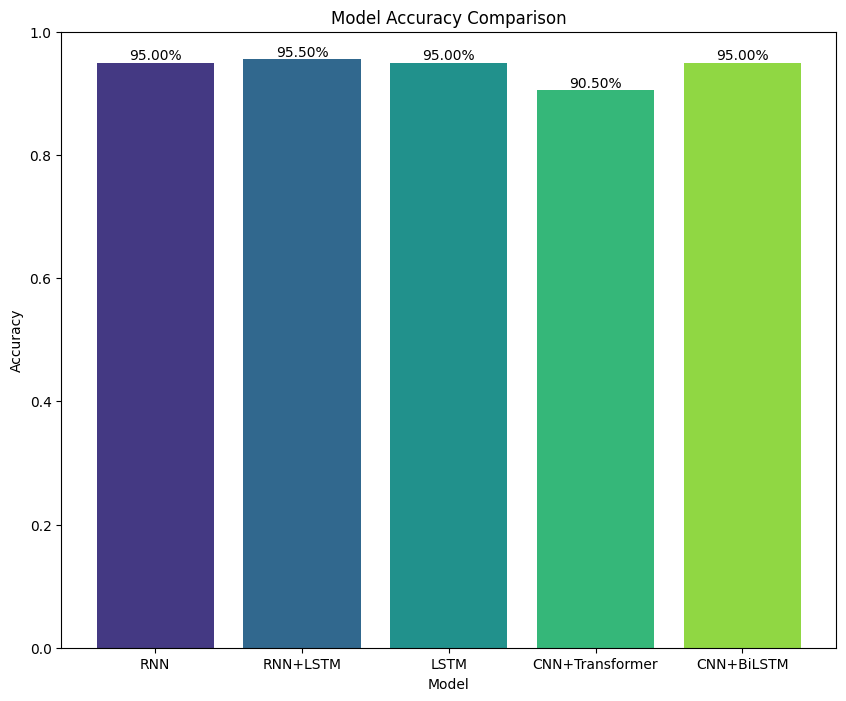

In [ ]:
# Plot comparison of model accuracies
plt.figure(figsize=(10, 8))
palette = sns.color_palette("viridis", 5)
bars = plt.bar(accuracies.keys(), accuracies.values(), color=palette)

# Add percentages above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate
        height,  # Y-coordinate
        f"{height * 100:.2f}%",  # Text (convert to percentage)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,  # Font size
        color='black'  # Text color
    )

plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)  # Ensure y-axis scale is between 0 and 1 for clarity
plt.show()



In [ ]:
# Plot loss and accuracy for all models
for model_name, history in histories.items():
    plt.figure(figsize=(12, 4))

    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"{model_name} Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f"{model_name} Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# prompt: use the code above and write a code that takes input from user and predicts if congested or not

import io
import pandas as pd
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV containing the data for prediction
  try:
    # Read the uploaded CSV file into a pandas DataFrame.
    # If the file is not a CSV, you will need to change this.
    user_input_df = pd.read_csv(io.BytesIO(uploaded[fn]))

    # Preprocess the user input
    # 1. Handle missing values (if any):
    user_input_df.fillna(user_input_df.mean(), inplace=True) # Fill with mean, adjust if necessary

    # 2. Feature scaling
    # Use the same scaler that was fitted during training
    user_input_scaled = scaler.transform(user_input_df) # Assuming 'scaler' is defined previously


    # 3. Reshape the data for RNN models.
    user_input_rnn = user_input_scaled.reshape(user_input_scaled.shape[0], user_input_scaled.shape[1], 1)

    # Make predictions using one of the trained models (e.g., the CNN+BiLSTM model)
    model = build_cnn_bilstm() # Replace with the best performing model

    #Load the model weights.  You must have saved them previously.
    model.load_weights('/content/my_model_weights.h5') #Replace with your file path.

    predictions = (model.predict(user_input_rnn) > 0.5).astype(int)

    # Interpret the predictions (0: non-congested, 1: congested)
    for prediction in predictions:
        if prediction[0] == 0:
            print("Prediction: Not Congested")
        else:
            print("Prediction: Congested")

  except pd.errors.ParserError:
      print(f"Error: Could not parse the uploaded file '{fn}' as a CSV.")
  except Exception as e:
      print(f"An error occurred: {e}")


Saving network_congestion_data.csv to network_congestion_data (2).csv
User uploaded file "network_congestion_data (2).csv" with length 48632 bytes
An error occurred: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/my_model_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

def preprocess_input(csv_path, sequence_length, feature_columns=None):
    """
    Preprocess the user-provided CSV file for prediction.

    Args:
        csv_path (str): Path to the CSV file containing the test examples.
        sequence_length (int): Sequence length used during model training.
        feature_columns (list): List of feature column names to use for prediction.

    Returns:
        np.ndarray: Preprocessed input data ready for model prediction.
    """
    # Load the CSV
    data = pd.read_csv(csv_path)

    # Default feature columns if not provided
    if feature_columns is None:
        feature_columns = ['Bandwidth_Mbps', 'Latency_ms', 'Packet_Loss_Rate_%', 'Jitter_ms']

    # Ensure all required columns are present
    missing_columns = [col for col in feature_columns if col not in data.columns]
    if missing_columns:
        raise ValueError(
            f"The following required columns are missing from the CSV: {missing_columns}. "
            f"Available columns are: {list(data.columns)}"
        )

    # Extract relevant feature columns and normalize/scale the data
    data = data[feature_columns].values
    data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)  # Standardization

    # Ensure input matches the expected sequence length
    if len(data) < sequence_length:
        # Pad with zeros if data is shorter than sequence length
        padded_data = np.zeros((sequence_length, data.shape[1]))
        padded_data[-len(data):] = data
        data = padded_data
    elif len(data) > sequence_length:
        # Truncate if data is longer than sequence length
        data = data[:sequence_length]

    return np.expand_dims(data, axis=0)  # Add batch dimension


def predict_congestion(model, csv_path, sequence_length, feature_columns=None):
    """
    Predict congestion using a given model.

    Args:
        model (tf.keras.Model): The trained model for prediction.
        csv_path (str): Path to the CSV file containing test examples.
        sequence_length (int): Sequence length used during training.
        feature_columns (list): List of feature column names to use for prediction.

    Returns:
        str: "Congested" or "Non-Congested".
    """
    # Preprocess input
    test_input = preprocess_input(csv_path, sequence_length, feature_columns)

    # Predict
    prediction = model.predict(test_input)

    # Interpret the result
    label = "Congested" if prediction[0] > 0.5 else "Non-Congested"
    return label


# Example Usage
if __name__ == "__main__":
    # Assuming `build_rnn_lstm`, `build_cnn_transformer`, and `build_cnn_bilstm` are defined,
    # and you have already trained and saved the models as .h5 files.

    # Load pre-trained models
    rnn_lstm_model = build_rnn_lstm()
    cnn_transformer_model = build_cnn_transformer()
    cnn_bilstm_model = build_cnn_bilstm()

    rnn_lstm_model.load_weights("/content/RNN+LSTM.weights.h5")
    cnn_transformer_model.load_weights("/content/CNN+Transformer.weights.h5")
    cnn_bilstm_model.load_weights("/content/CNN+BiLSTM.weights.h5")

    # User-provided CSV file path
    csv_path = "/content/network.csv"

    # Sequence length (should match the sequence length used during training)
    sequence_length = 50  # Example value; replace with actual value from training

    # Feature columns
    feature_columns = ['Bandwidth_Mbps', 'Latency_ms', 'Packet_Loss_Rate_%', 'Jitter_ms']

    # Predictions
    try:
        print("RNN + LSTM Prediction:", predict_congestion(rnn_lstm_model, csv_path, sequence_length, feature_columns))
        print("CNN + Transformer Prediction:", predict_congestion(cnn_transformer_model, csv_path, sequence_length, feature_columns))
        print("CNN + BiLSTM Prediction:", predict_congestion(cnn_bilstm_model, csv_path, sequence_length, feature_columns))
    except ValueError as e:
        print(e)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Exception encountered when calling SimpleRNNCell.call().

Dimensions must be equal, but are 4 and 1 for '{{node sequential_66_1/simple_rnn_34_1/simple_rnn_cell_1/MatMul}} = MatMul[T=DT_FLOAT, grad_a=false, grad_b=false, transpose_a=false, transpose_b=false](sequential_66_1/simple_rnn_34_1/strided_slice_1, sequential_66_1/simple_rnn_34_1/simple_rnn_cell_1/Cast/ReadVariableOp)' with input shapes: [1,4], [1,32].

Arguments received by SimpleRNNCell.call():
  • sequence=tf.Tensor(shape=(1, 4), dtype=float32)
  • states=('tf.Tensor(shape=(1, 32), dtype=float32)',)
  • training=False
